In [14]:
import tensorflow as tf
import os

In [15]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [16]:
os.listdir('archive/train/happy')

['Training_10019449.jpg',
 'Training_10046809.jpg',
 'Training_10066226.jpg',
 'Training_10070997.jpg',
 'Training_10080933.jpg',
 'Training_10109375.jpg',
 'Training_10116721.jpg',
 'Training_10127474.jpg',
 'Training_10133389.jpg',
 'Training_10139297.jpg',
 'Training_10142161.jpg',
 'Training_10142426.jpg',
 'Training_10181727.jpg',
 'Training_1018317.jpg',
 'Training_10199847.jpg',
 'Training_10209551.jpg',
 'Training_10220224.jpg',
 'Training_10229138.jpg',
 'Training_10230185.jpg',
 'Training_10239785.jpg',
 'Training_10240470.jpg',
 'Training_10242543.jpg',
 'Training_10246389.jpg',
 'Training_10248095.jpg',
 'Training_10257744.jpg',
 'Training_10265501.jpg',
 'Training_1027250.jpg',
 'Training_10288829.jpg',
 'Training_10290756.jpg',
 'Training_10313464.jpg',
 'Training_10348116.jpg',
 'Training_10361011.jpg',
 'Training_10367793.jpg',
 'Training_10391066.jpg',
 'Training_1041361.jpg',
 'Training_10422282.jpg',
 'Training_10425802.jpg',
 'Training_10435640.jpg',
 'Training_1043

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [58]:
train_dir='archive/train/data1'
test_dir='archive/test/data1'

In [ ]:
image_exsts=['jpeg','png','jpg','bmp']

In [59]:
img=  cv2.imread(os.path.join(train_dir, 'happy','Training_1206.jpg'))
img.shape

(48, 48, 3)

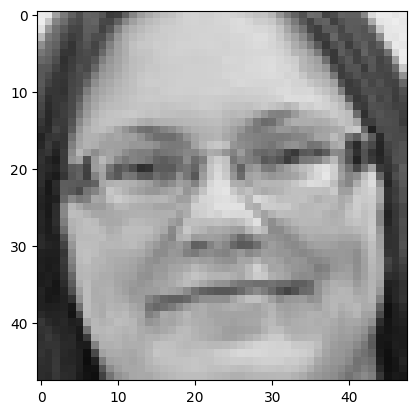

In [60]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

**Load Data**

In [ ]:
tf.data.Dataset??

In [18]:
import numpy as np

In [9]:
tf.keras.utils.image_dataset_from_directory??

In [62]:
train_data= tf.keras.utils.image_dataset_from_directory(train_dir, color_mode='grayscale',image_size=(48,48),batch_size=64)

Found 12045 files belonging to 2 classes.


In [63]:
test_data= tf.keras.utils.image_dataset_from_directory(test_dir, color_mode='grayscale',image_size=(48,48),batch_size=64)

Found 3021 files belonging to 2 classes.


In [ ]:
# data_iterator = data.as_numpy_iterator()

In [ ]:
# data_iterator

In [ ]:
# batch = data_iterator.next()

In [ ]:
# batch

In [ ]:
# len(batch)

2

In [ ]:
# batch[0].shape #images

(32, 256, 256, 3)

In [ ]:
# batch[1].shape #labels

(32,)

In [ ]:
# batch[1] #class 0=happy , class 1=sad

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int32)

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

**PreProcess Data**


Scale Data

In [64]:
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

In [ ]:
img=  cv2.imread(os.path.join(data_dir, 'happy','Training_1206.jpg'))
img.shape

(48, 48, 3)

In [ ]:
scaled_data=data.as_numpy_iterator()

In [ ]:
batch= scaled_data.next()

In [ ]:
batch[0].shape

(32, 48, 48, 1)

In [ ]:
# batch[0].min()

0.0

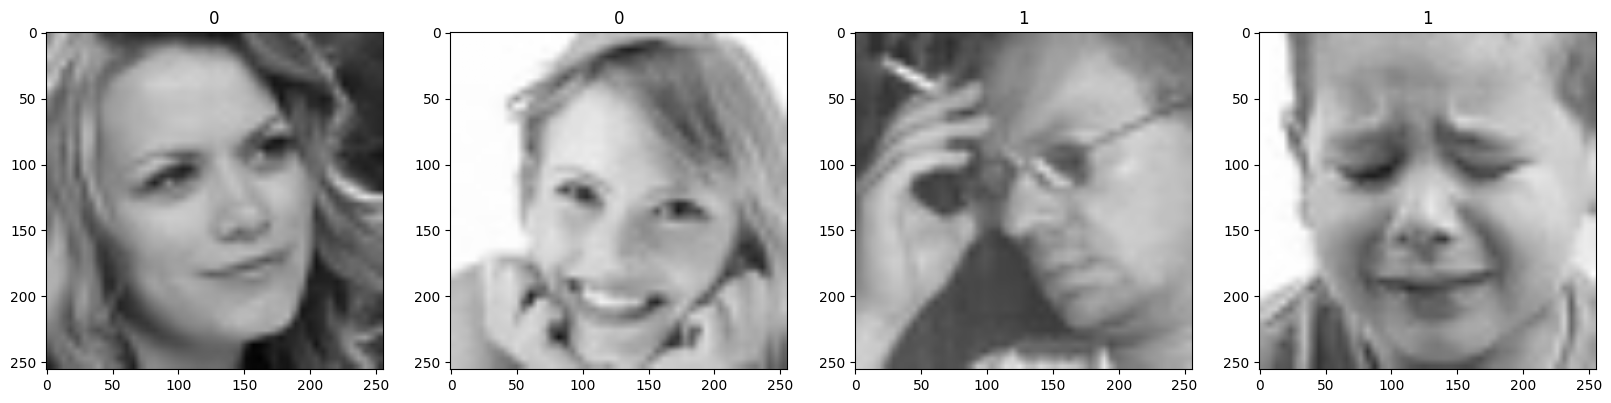

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

In [65]:
len(train_data)

189

In [66]:
len(test_data)

48

In [69]:
# train_size = int(len(train_data)*.7)
val_size = int(len(test_data)*.5)
test_size = int(len(test_data)*.5)

In [49]:
train_size

314

In [70]:
val_size+test_size

48

In [44]:
val_size

89

In [20]:
test_size

56

In [71]:
train = train_data
val = test_data.take(val_size)
test = test_data.skip(val_size).take(test_size)

In [72]:
len(train)

189

**Build Deep Learning Model**


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [74]:
model = Sequential()

In [75]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 16)        

 **Train**




In [78]:
logdir='logs'

In [79]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [80]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
189/189 [==============================] - 16s 77ms/step - loss: 0.6287 - accuracy: 0.6447 - val_loss: 0.5920 - val_accuracy: 0.7031
Epoch 2/10
189/189 [==============================] - 3s 15ms/step - loss: 0.5315 - accuracy: 0.7306 - val_loss: 0.5016 - val_accuracy: 0.7513
Epoch 3/10
189/189 [==============================] - 3s 15ms/step - loss: 0.4819 - accuracy: 0.7612 - val_loss: 0.4607 - val_accuracy: 0.7812
Epoch 4/10
189/189 [==============================] - 3s 14ms/step - loss: 0.4462 - accuracy: 0.7818 - val_loss: 0.4624 - val_accuracy: 0.7741
Epoch 5/10
189/189 [==============================] - 3s 14ms/step - loss: 0.4144 - accuracy: 0.8010 - val_loss: 0.4640 - val_accuracy: 0.7786
Epoch 6/10
189/189 [==============================] - 3s 15ms/step - loss: 0.3885 - accuracy: 0.8172 - val_loss: 0.4364 - val_accuracy: 0.7930
Epoch 7/10
189/189 [==============================] - 3s 16ms/step - loss: 0.3680 - accuracy: 0.8271 - val_loss: 0.4151 - val_accuracy: 0.800

**Plot Performance**

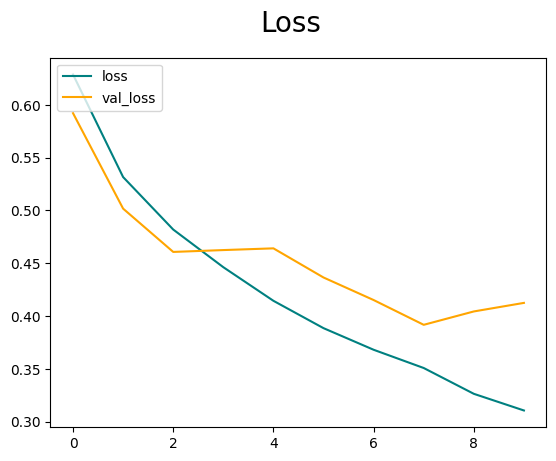

In [82]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

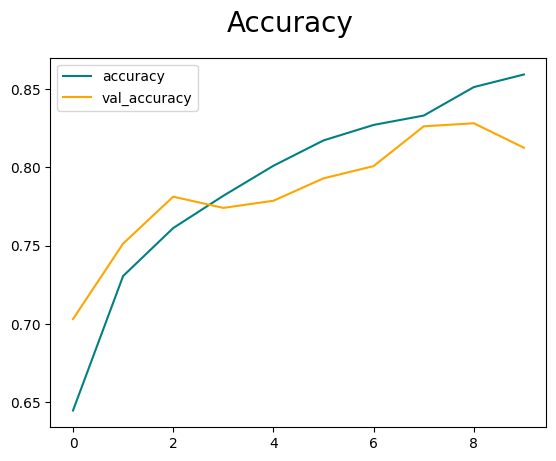

In [83]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Evaluate Performance**

In [84]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [85]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [86]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 57ms/step


In [87]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7568345, shape=(), dtype=float32) tf.Tensor(0.8608838, shape=(), dtype=float32) tf.Tensor(0.82895625, shape=(), dtype=float32)


**Test**

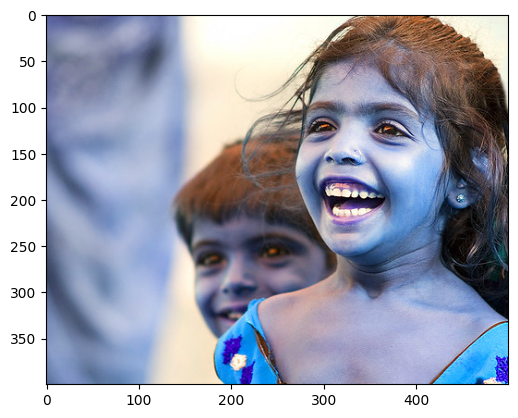

In [ ]:
# img = cv2.imread('/content/538692449_cb1853bb50.jpg')
# plt.imshow(img)
# plt.show()

In [ ]:
# img.shape

(48, 48, 3)

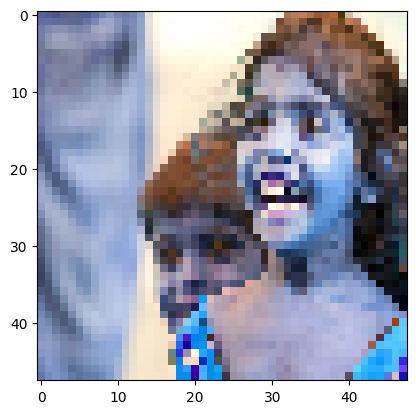

In [ ]:
# resized = tf.image.resize(img, (48,48))
# # bw = cv2.cvtColor(resized.numpy(), cv2.COLOR_BGR2GRAY)
# plt.imshow(resized.numpy().astype(int))
# plt.show()

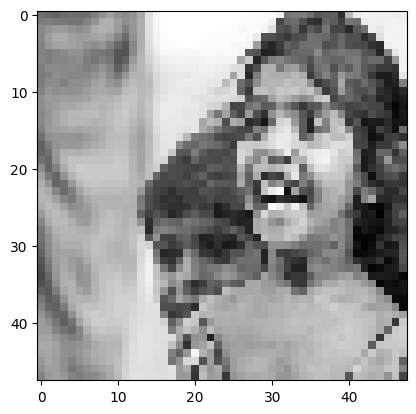

In [ ]:
# bw = cv2.cvtColor(resized.numpy(), cv2.COLOR_BGR2GRAY)
# plt.imshow(bw,cmap='gray')
# plt.show()

In [ ]:
# bw=np.expand_dims(bw,axis=2)

In [ ]:
# bw.shape

(48, 48, 1)

In [ ]:
# bw=bw/255

In [ ]:
# bw

In [ ]:
# yhat = model.predict(np.expand_dims(bw, 0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
# yhat

array([[0.2589867]], dtype=float32)

In [ ]:
yhat=predict_mood("/content/ed02eb81b355a532defca34d44427dc9--happy-smile-happy-faces.jpg")
yhat

1/1 [==============================] - 0s 19ms/step


array([[8.357227e-05]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


**Save The Model**

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model.save(os.path.join('models','happy&sadClassifier.h5'))

NameError: name 'model' is not defined

In [21]:
loaded_model = load_model('models/happy&sadClassifier.h5')

In [22]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

**Predict**

1086 754 1384 1384
3135 697 1384 1384
5668 3080 54 54
846 260 54 54
120 1571 81 81
118 1598 81 81


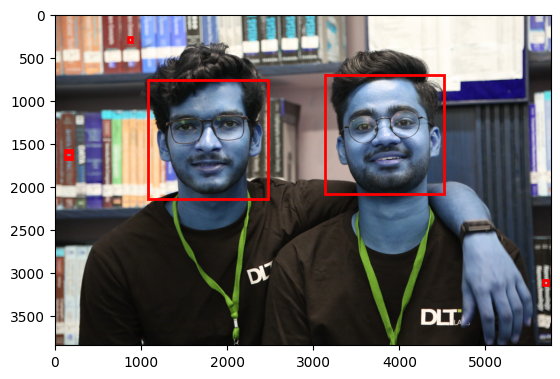

In [23]:
from matplotlib.patches import Rectangle
fig,ax=plt.subplots()
img=cv2.imread("C:/Users/Aaftab/Downloads/NIET0165 (1).JPG")
faces=face_cascade.detectMultiScale(img, 1.5, 6)
ax.imshow(img)
for (x,y,w,h) in faces:
    print(x,y,w,h)
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    rect=Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

plt.show()


In [24]:
def predict_mood(img_path,loaded_model):
    yhat_list=[]
#     img = cv2.imread(img_path)
    img = img_path
    faces=face_cascade.detectMultiScale(img, 1.4, 6)
    fig,ax=plt.subplots()
#     faces=np.expand_dims(faces[0],0)
#     print(faces)
    ax.imshow(img)
    for (x,y,w,h) in faces:
        crpd_img=img[y:y+h,x:x+w]
#         plt.imshow(crpd_img)
#         plt.show()
        resized = tf.image.resize(crpd_img, (48,48))
#         plt.imshow(resized.numpy().astype(int))
#         plt.show()
        bw = cv2.cvtColor(resized.numpy(), cv2.COLOR_RGB2GRAY)
        bw=np.expand_dims(bw,axis=2)
        bw=bw/255
        yhat = loaded_model.predict(np.expand_dims(bw, 0))
        if yhat>0.5:
            label="Sad"
        else:
            label="Happy"
        rect=Rectangle((x,y),w,h,linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        ax.text(x,y-10,label,color='r',fontsize=12,bbox=dict(facecolor='white',edgecolor='red',alpha=0.8))
    plt.show()
#         yhat_list.append(yhat)
#     return yhat[0]

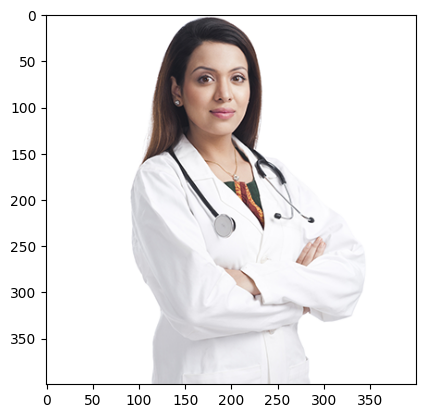

InternalError: Graph execution error:

Detected at node 'sequential_2/dense_4/MatMul' defined at (most recent call last):
    File "C:\Program Files\Python\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Program Files\Python\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Program Files\Python\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Aaftab\AppData\Local\Temp\ipykernel_10276\2548788668.py", line 5, in <module>
      mood= predict_mood(img,loaded_model)
    File "C:\Users\Aaftab\AppData\Local\Temp\ipykernel_10276\200019352.py", line 20, in predict_mood
      yhat = loaded_model.predict(np.expand_dims(bw, 0))
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Aaftab\AppData\Roaming\Python\Python310\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential_2/dense_4/MatMul'
Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[{{node sequential_2/dense_4/MatMul}}]] [Op:__inference_predict_function_981]

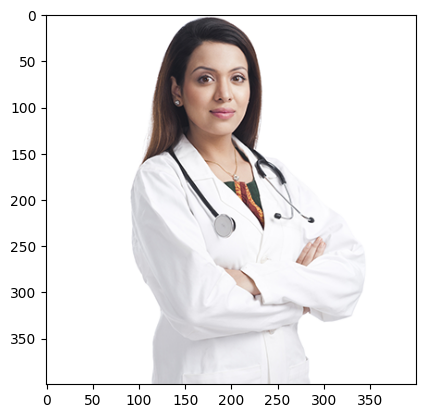

In [25]:
img=cv2.imread("C:/Users/Aaftab/Downloads/png-woman-doctor-transparent-woman-doctor-images-40.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
mood= predict_mood(img,loaded_model)
# print(mood)
# if mood>0.5:
#   print("Person is sad")
# else:
#   print("Person is happy")

In [101]:
paths=os.listdir('archive/test/sad')

In [102]:
sad=happy=count=0
for i in paths:
    count+=1
    if count==800:
        break
    mood= predict_mood(os.path.join('archive/test/sad',str(i)),loaded_model)
    print(mood)
    if mood>0.5:
        sad+=1
        print(count,"Person is sad")
    else:
        happy+=1
        print(count,"Person is happy")
print(happy,sad)

1/1 [==============================] - 0s 18ms/step
[[0.9982116]]
1 Person is sad
1/1 [==============================] - 0s 16ms/step
[[0.9971161]]
2 Person is sad
1/1 [==============================] - 0s 17ms/step
[[0.9838486]]
3 Person is sad
1/1 [==============================] - 0s 17ms/step
[[0.8815037]]
4 Person is sad
1/1 [==============================] - 0s 17ms/step
[[0.5062819]]
5 Person is sad
1/1 [==============================] - 0s 20ms/step
[[0.8283568]]
6 Person is sad
1/1 [==============================] - 0s 17ms/step
[[0.08289339]]
7 Person is happy
1/1 [==============================] - 0s 17ms/step
[[0.8758998]]
8 Person is sad
1/1 [==============================] - 0s 20ms/step
[[0.9979274]]
9 Person is sad
1/1 [==============================] - 0s 20ms/step
[[0.8722278]]
10 Person is sad
1/1 [==============================] - 0s 22ms/step
[[0.6842385]]
11 Person is sad
1/1 [==============================] - 0s 17ms/step
[[0.9716106]]
12 Person is sad
1/1 [=====

KeyboardInterrupt: 